Shape of dataset: (9120, 11)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       9120 non-null   int64  
 1   kids           9120 non-null   int64  
 2   age            9120 non-null   int64  
 3   education      9120 non-null   int64  
 4   year           9120 non-null   int64  
 5   siblings       9120 non-null   int64  
 6   agefirstbirth  3312 non-null   float64
 7   ethnicity      9120 non-null   object 
 8   city16         9120 non-null   object 
 9   lowincome16    9120 non-null   object 
 10  immigrant      9120 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 783.9+ KB
None

Summary Statistics:
           rownames         kids          age    education         year  \
count   9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
unique          NaN          Na

<Figure size 1200x800 with 0 Axes>

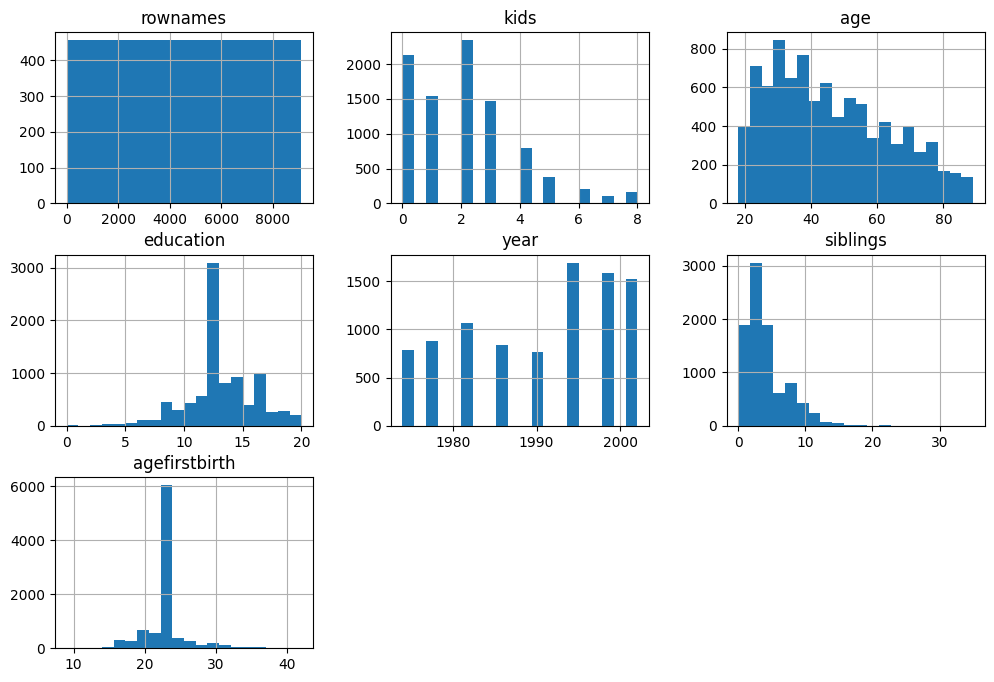

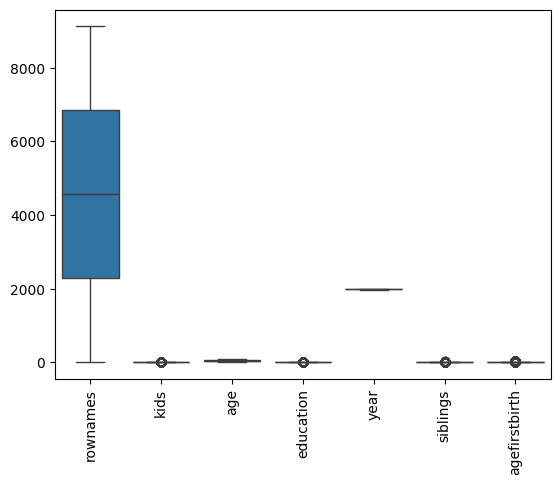

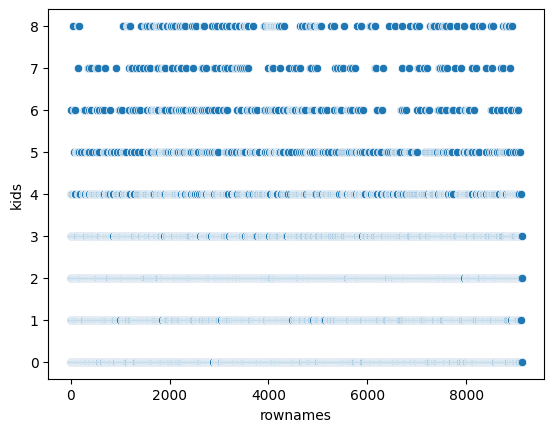

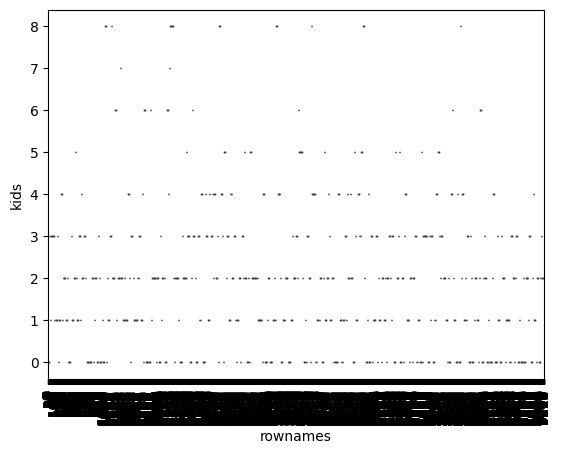

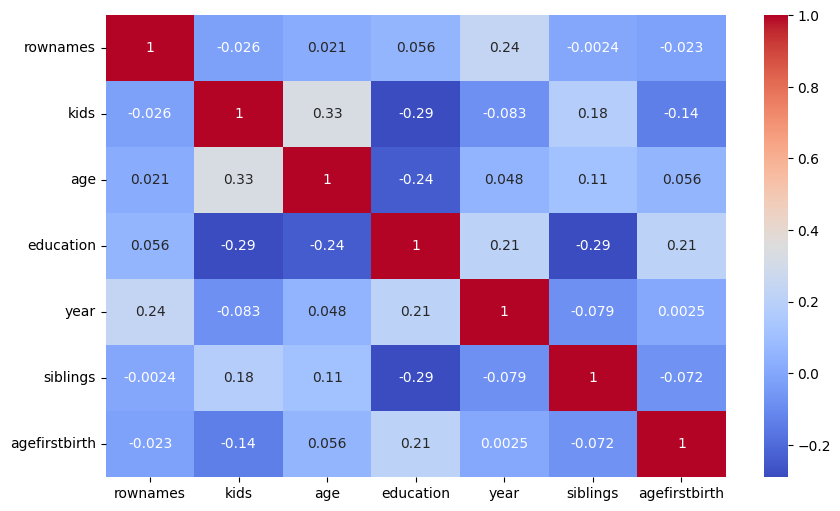

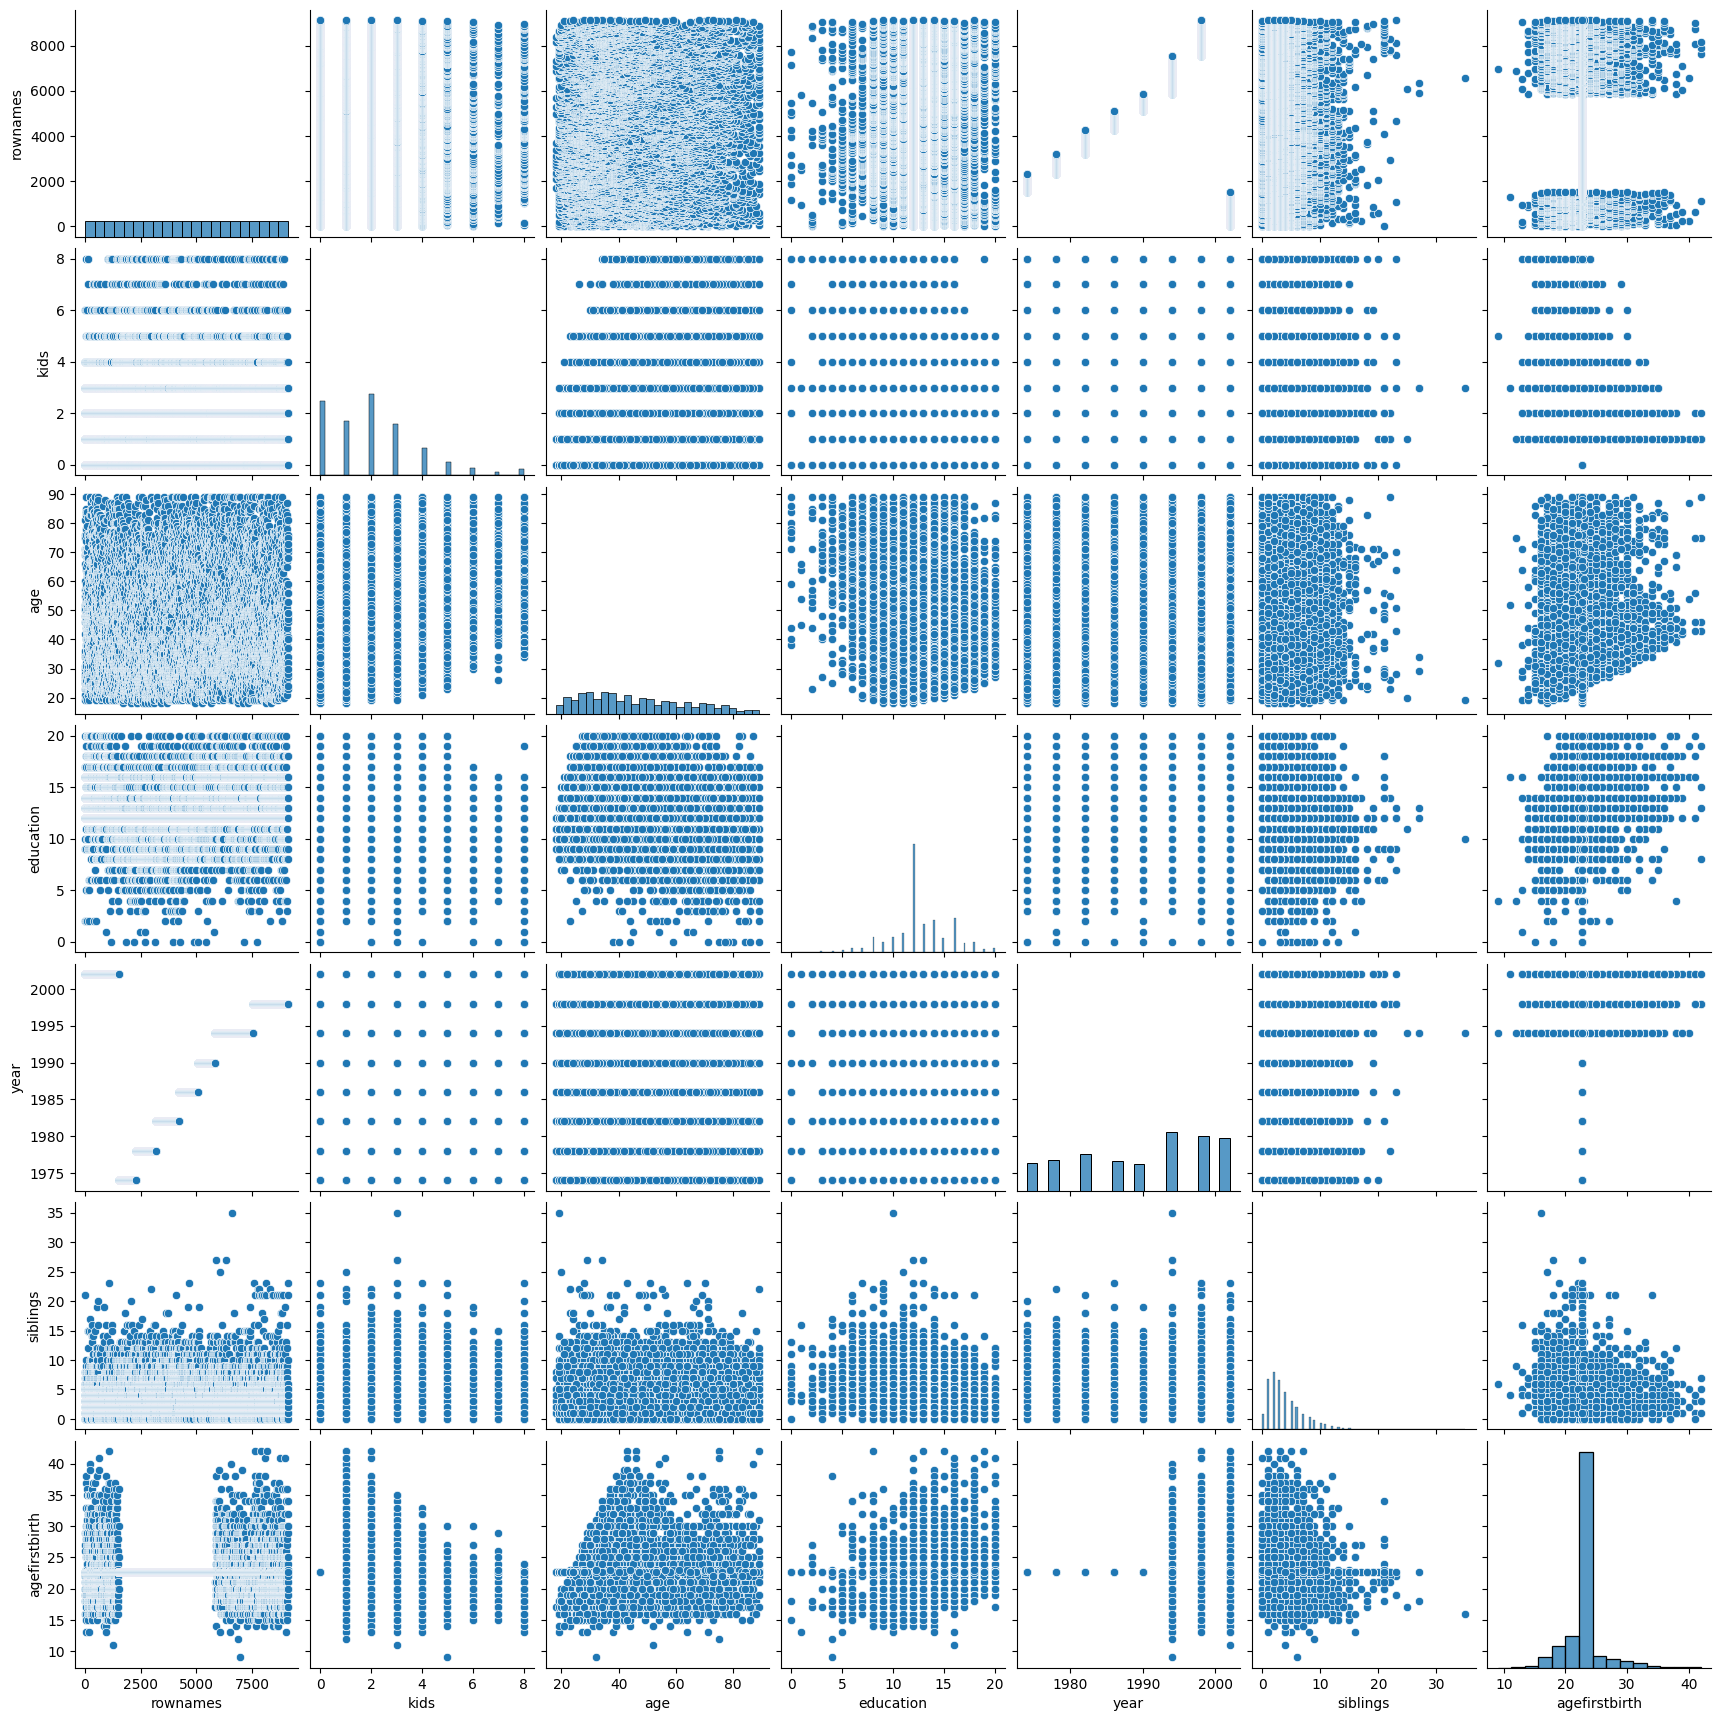

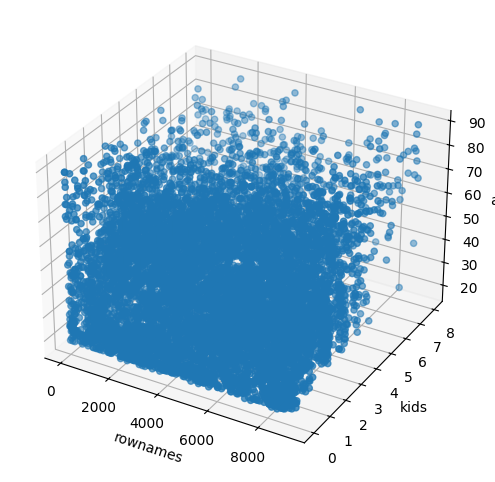

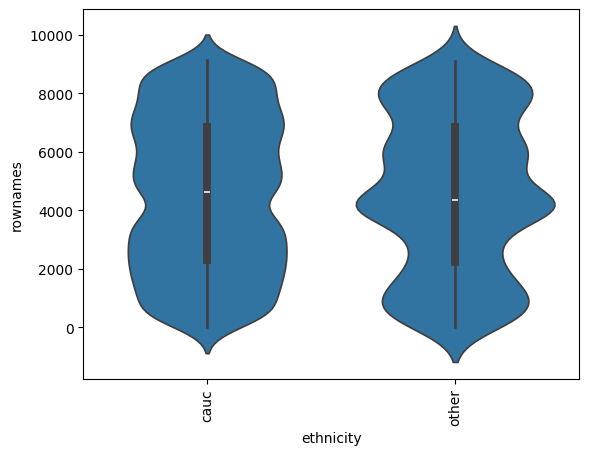

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load Dataset
df = pd.read_csv("https://cdn.jsdelivr.net/gh/Piyushanand7/21BDS0038@main/21BDS0038.csv")

# Data Exploration
print("Shape of dataset:", df.shape)
print("\nColumn Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Handling Missing Values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values
if len(num_cols) > 0:
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Univariate Analysis
plt.figure(figsize=(12, 8))
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.show()

sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis
if len(num_cols) >= 2:
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.show()

    sns.boxplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.xticks(rotation=90)
    plt.show()

# Correlation Matrix
if len(num_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
    plt.show()

# Multivariate Analysis
if len(num_cols) > 1:
    sns.pairplot(df[num_cols])
    plt.show()

if len(num_cols) >= 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[num_cols[0]], df[num_cols[1]], df[num_cols[2]])
    ax.set_xlabel(num_cols[0])
    ax.set_ylabel(num_cols[1])
    ax.set_zlabel(num_cols[2])
    plt.show()

if len(cat_cols) > 0 and len(num_cols) > 0:
    sns.violinplot(x=df[cat_cols[0]], y=df[num_cols[0]], data=df)
    plt.xticks(rotation=90)
    plt.show()
